In [ ]:
#check for libraries
!pip install pandas openpyxl

import pandas as pd
from scipy.signal import find_peaks
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Add this import
from sqlalchemy import create_engine, text

# no agg Excel file
dfnoagg = pd.read_excel('/Users/christinacastillo/Desktop/DS311/DS311-Group-Project-Documentation/dognition/dognition_data_no_aggregation_with_zip_code_correction.xlsx')
df = dfnoagg

In [14]:


# Assuming df is your DataFrame and it has already been processed
# Replace values in Free_Start_User
df['Free_Start_User'] = df['Free_Start_User'].replace({0: 'Not Free Start', 1: 'Free Start'})
df.loc[df['Free_Start_User'].isna(), 'Free_Start_User'] = 'No Value'
df.loc[~df['Free_Start_User'].isin(['Not Free Start', 'Free Start', 'No Value']), 'Free_Start_User'] = 'Other Loc'

# Convert Created_at to datetime if not already done
df['Created_at'] = pd.to_datetime(df['Created_at'])

# Extract year from Created_at
df['Year'] = df['Created_at'].dt.year

# Group by Year and Free_Start_User, counting unique User_IDs
yearly_counts = df.groupby(['Year', 'Free_Start_User'])['User_ID'].nunique().unstack(fill_value=0)

# Rename columns for clarity (optional)
yearly_counts.columns.name = None

# Display the resulting table
print(yearly_counts)

      No Value  Other Loc
Year                     
2013      2289       2198
2014      4863        665
2015      5180       2360


In [53]:

# Load the no aggregation Excel file
dfnoagg = pd.read_excel('/Users/christinacastillo/Desktop/DS311/DS311-Group-Project-Documentation/dognition/dognition_data_no_aggregation_with_zip_code_correction.xlsx')

# Select only the necessary columns
df = dfnoagg[['Free_Start_User', 'User_ID', 'Created_at']]

# Define Canadian neighborhoods
canadian_neighborhoods = [
    "Nepean East", "Thornhill West", "North Island", "Quinte Shores", 
    "Whitby Southeast", "London (Talbot / Lambeth / West Tempo / South Sharon Creek)",
    "Mississauga (West Cooksville / Fairview / City Centre / East Creditview)",
    "Richmond Hill Southwest", "Downtown Toronto (Regent Park / Port of Toronto)",
    "East Toronto (The Beaches)", "Guelph Northwest", 
    "West Toronto (Brockton / Parkdale Village / Exhibition Place)", "Victoria North",
    "Vancouver (NE Downtown / Harbour Centre / Gastown / Yaletown)",
    "Vancouver (Central Kitsilano)", "Pembroke Central and northern subdivisions",
    "Ahuntsic Southwest", "Guelph North", 
    "Scarborough (Guildwood / Morningside / Ellesmere)", "Grimsby", 
    "South Okanagan (Summerland)", "North Bay Central", "Burlington South",
    "Ancaster West", "Georgian Bay Southwest Shore (Dundalk)", "Harrietsfield",
    "Outaouais-Sud (Thurso)", "Stouffville", 
    "West Toronto (Bloor West Village / Swansea)", 
    "Vancouver (Dunbar- Southlands / Musqueam)", "Oak Bay North", 
    "St. John's Northwest Newfoundland & Labrador Provincial Government",
    "Whitby North", "Oakville West"
]

# Create a function to categorize Free_Start_User
def categorize_free_start(user_status):
    if user_status == 1:
        return "Free_Start_User"
    elif user_status == 0:
        return "Non_Free_Start_User"
    else:
        return "Nulls/Blanks"

# Apply the function to categorize Free_Start_User using .loc to avoid warnings
df.loc[:, 'User_Category'] = df['Free_Start_User'].apply(categorize_free_start)

# Convert 'Created_at' to datetime and extract the year
df.loc[:, 'Year'] = pd.to_datetime(df['Created_at'], errors='coerce').dt.year

# Create a Canada_Location column based on neighborhood using .loc
df.loc[:, 'Canada_Location'] = df['Free_Start_User'].apply(lambda x: 'Canada_Loc_User' if x in canadian_neighborhoods else 'Non_Canada_Loc_User')

# Group and count unique rows by year and location category
summary = df.groupby(['Year', 'User_Category', 'Canada_Location']).size().unstack(fill_value=0)

# Count distinct user IDs grouped by Free_Start_User
user_count = df.groupby('Free_Start_User')['User_ID'].nunique().reset_index()
user_count.columns = ['Free_Start_User', 'Count_Uniq_User']

# Display the summaries
print("Summary of User Categories by Year:")
print(summary.loc[2013:2015])

print("\nCount of Unique Users by Free Start User:")
print(user_count)


Summary of User Categories by Year:
Canada_Location           Canada_Loc_User  Non_Canada_Loc_User
Year User_Category                                            
2013 Free_Start_User                    0                10567
     Non_Free_Start_User                0                 3352
     Nulls/Blanks                      68                31951
2014 Free_Start_User                    0                 1980
     Non_Free_Start_User                0                 5262
     Nulls/Blanks                     355                55472
2015 Free_Start_User                    0                11670
     Non_Free_Start_User                0                 3034
     Nulls/Blanks                      33                53737

Count of Unique Users by Free Start User:
                                      Free_Start_User  Count_Uniq_User
0                                                   0              517
1                                                   1             4423
2              

/var/folders/g8/jh1nyfr12zgdsj3nydwzyhjm0000gn/T/ipykernel_86318/3668186380.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'User_Category'] = df['Free_Start_User'].apply(categorize_free_start)
/var/folders/g8/jh1nyfr12zgdsj3nydwzyhjm0000gn/T/ipykernel_86318/3668186380.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Year'] = pd.to_datetime(df['Created_at'], errors='coerce').dt.year
/var/folders/g8/jh1nyfr12zgdsj3nydwzyhjm0000gn/T/ipykernel_86318/3668186380.py:44: SettingWithCo

    Year  count_Uniq_user    User_Category
0   2013                6  Canada_Loc_User
1   2013             2038       Free_Start
2   2013              154   Not_Free_Start
3   2013             2289     Nulls_Blanks
4   2014               35  Canada_Loc_User
5   2014              305       Free_Start
6   2014              325   Not_Free_Start
7   2014             4863     Nulls_Blanks
8   2015                4  Canada_Loc_User
9   2015             2204       Free_Start
10  2015              152   Not_Free_Start
11  2015             5180     Nulls_Blanks


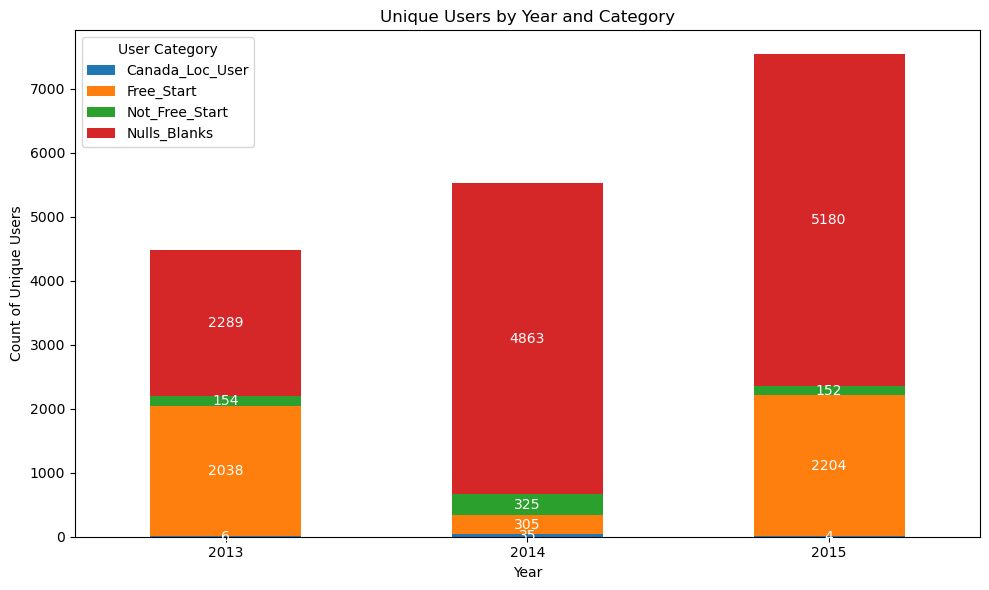

In [61]:

from sqlalchemy import create_engine, text

# Load the Excel file
excel_file_path = '/Users/christinacastillo/Desktop/DS311/DS311-Group-Project-Documentation/dognition/dognition_data_no_aggregation_with_zip_code_correction.xlsx'
df = pd.read_excel(excel_file_path)

# Clean and select necessary columns
df = df[['User_ID', 'Free_Start_User', 'Created_at']]

# Convert 'Created_at' to datetime and extract the year
df['Created_at'] = pd.to_datetime(df['Created_at'], errors='coerce')
df['Year'] = df['Created_at'].dt.year

# Create a SQLite database (or connect to an existing one)
sqlite_db_path = 'dognition_data.db'
engine = create_engine(f'sqlite:///{sqlite_db_path}')

# Write the DataFrame to SQLite
df.to_sql('dognition_table', con=engine, if_exists='replace', index=False)

# SQL query to count unique users by year and handle Canada locations
query = """
SELECT 
    Year,
    COUNT(DISTINCT User_ID) AS count_Uniq_user,
    CASE 
        WHEN Free_Start_User = '0' THEN 'Not_Free_Start'
        WHEN Free_Start_User = '1' THEN 'Free_Start'
        WHEN Free_Start_User IS NULL OR Free_Start_User = '' THEN 'Nulls_Blanks'
        ELSE 'Canada_Loc_User' 
    END AS User_Category
FROM 
    dognition_table
GROUP BY 
    Year, User_Category;
"""

# Execute the query and fetch results
with engine.connect() as connection:
    result = connection.execute(text(query)).fetchall()

# Convert results to a DataFrame
results_df = pd.DataFrame(result, columns=['Year', 'count_Uniq_user', 'User_Category'])

# Display the DataFrame as a table
print(results_df)

# Plot the output
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='white')

plt.title('Unique Users by Year and Category')
plt.xlabel('Year')
plt.ylabel('Count of Unique Users')
plt.legend(title='User Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

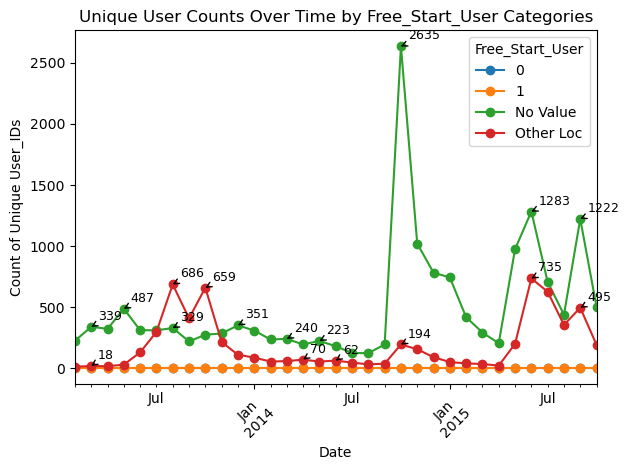

In [9]:




# Replace NaN values in Free_Start_User with 'No Value'
df['Free_Start_User'] = df['Free_Start_User'].fillna('No Value')

# Merge categories: set 'Other Loc' for values not in ['0', '1', 'No Value']
df['Free_Start_User'] = df['Free_Start_User'].apply(
    lambda x: 'Other Loc' if x not in ['0', '1', 'No Value'] else x
)

# Convert Created_at to datetime
df['Created_at'] = pd.to_datetime(df['Created_at'])

# Filter only relevant Free_Start_User categories
df_filtered = df[df['Free_Start_User'].isin(['0', '1', 'No Value', 'Other Loc'])]

# Group by date and Free_Start_User, and count unique User_IDs
time_series_counts = (
    df_filtered.groupby([df_filtered['Created_at'].dt.to_period('M'), 'Free_Start_User'])['User_ID']
    .nunique()
    .reset_index(name='Unique_User_Count')
)

# Pivot the table for better visualization
pivot_table = time_series_counts.pivot(index='Created_at', columns='Free_Start_User', values='Unique_User_Count').fillna(0)

# Ensure all categories are represented
for category in ['0', '1', 'No Value', 'Other Loc']:
    if category not in pivot_table.columns:
        pivot_table[category] = 0

# Reorder columns to maintain desired order in the legend
pivot_table = pivot_table[['0', '1', 'No Value', 'Other Loc']]

# Plot the time series
plt.figure(figsize=(12, 6))
lines = pivot_table.plot(kind='line', marker='o')

# Adding data labels at peaks
for col in pivot_table.columns:
    y_data = pivot_table[col].values
    x_data = pivot_table.index

    # Identify peaks for labeling
    peak_indices = (y_data[1:-1] > y_data[:-2]) & (y_data[1:-1] > y_data[2:])
    peak_indices = np.concatenate(([False], peak_indices, [False]))  # Adjust for indexing

    # Annotate peaks
    for i in range(len(peak_indices)):
        if peak_indices[i]:
            plt.annotate(f'{int(y_data[i])}', 
                         xy=(x_data[i].to_timestamp(), y_data[i]), 
                         xytext=(5, 5), 
                         textcoords='offset points',
                         fontsize=9, 
                         arrowprops=dict(arrowstyle='->', color='black'))

plt.title('Unique User Counts Over Time by Free_Start_User Categories')
plt.xlabel('Date')
plt.ylabel('Count of Unique User_IDs')
plt.xticks(rotation=45)
plt.legend(title='Free_Start_User')
plt.tight_layout()
plt.show()



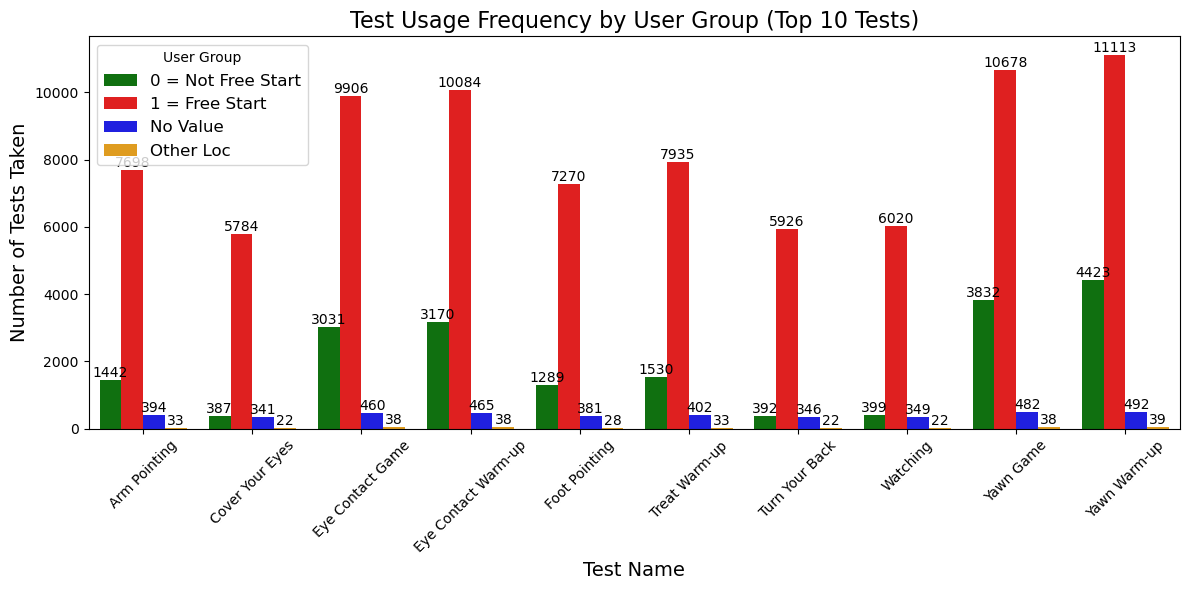

In [20]:


# Load your dataset
df = pd.read_excel('/Users/christinacastillo/Desktop/DS311/DS311-Group-Project-Documentation/dognition/dognition_data_no_aggregation_with_zip_code_correction.xlsx')

# Group Free_Start_User values, converting 0 and 1, and setting others to 'Other Loc'
df['Free_Start_User'] = df['Free_Start_User'].replace({0: 'Not Free Start', 1: 'Free Start'})
df.loc[df['Free_Start_User'].isna(), 'Free_Start_User'] = 'No Value'
df.loc[~df['Free_Start_User'].isin(['Not Free Start', 'Free Start', 'No Value']), 'Free_Start_User'] = 'Other Loc'

# Group by Test name and Free_Start_User, counting unique User_IDs
test_usage_counts = (
    df.groupby(['Test_name', 'Free_Start_User'])['User_ID']
    .nunique()
    .reset_index(name='Test_Count')
)

# Get total counts for each test across all user groups
total_counts = test_usage_counts.groupby('Test_name')['Test_Count'].sum()

# Get top 10 tests based on total counts
top_tests = total_counts.nlargest(10).index

# Filter the data for top tests, ensuring "No Value" is included
filtered_tests = test_usage_counts[test_usage_counts['Test_name'].isin(top_tests)]

# Ensure "No Value" counts are included in the final DataFrame
if 'No Value' not in filtered_tests['Free_Start_User'].values:
    na_value_counts = test_usage_counts[test_usage_counts['Free_Start_User'] == 'No Value']
    filtered_tests = pd.concat([filtered_tests, na_value_counts], ignore_index=True)

# Convert 'Free_Start_User' to a categorical variable
filtered_tests.loc[:, 'Free_Start_User'] = filtered_tests['Free_Start_User'].astype(str)

# Define a color palette
color_palette = {
    'Free Start': 'green', 
    'Not Free Start': 'blue', 
    'No Value': 'red', 
    'Other Loc': 'orange'
}

# Plotting Test Usage Frequency by User Group and Test Name
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=filtered_tests, x='Test_name', y='Test_Count', hue='Free_Start_User', palette=color_palette)
plt.title('Test Usage Frequency by User Group (Top 10 Tests)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Test Name', fontsize=14)
plt.ylabel('Number of Tests Taken', fontsize=14)

# Update legend labels for clarity
handles, labels = ax.get_legend_handles_labels()
new_labels = ['0 = Not Free Start', '1 = Free Start', 'No Value', 'Other Loc']
ax.legend(handles, new_labels, title='User Group', fontsize=12)

# Annotate data points for the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

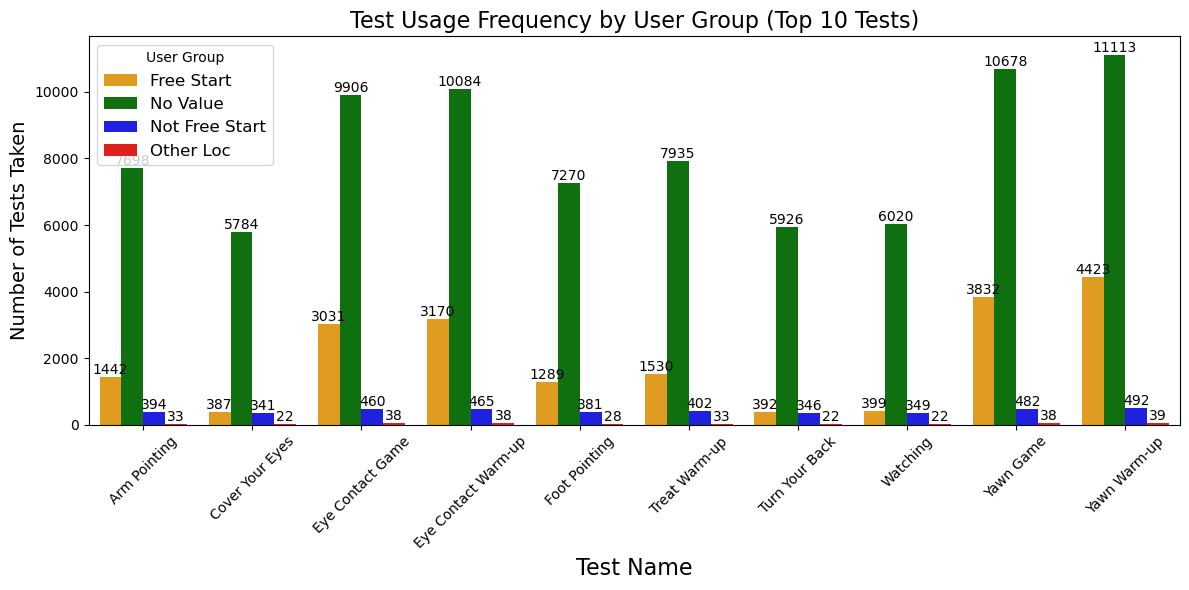

In [31]:


# Load your dataset
df = pd.read_excel('/Users/christinacastillo/Desktop/DS311/DS311-Group-Project-Documentation/dognition/dognition_data_no_aggregation_with_zip_code_correction.xlsx')

# Group Free_Start_User values, converting 0 and 1, and setting others to 'Other Loc'
df['Free_Start_User'] = df['Free_Start_User'].replace({0: 'Not Free Start', 1: 'Free Start'})
df.loc[df['Free_Start_User'].isna(), 'Free_Start_User'] = 'No Value'
df.loc[~df['Free_Start_User'].isin(['Not Free Start', 'Free Start', 'No Value']), 'Free_Start_User'] = 'Other Loc'

# Group by Test name and Free_Start_User, counting unique User_IDs
test_usage_counts = (
    df.groupby(['Test_name', 'Free_Start_User'])['User_ID']
    .nunique()
    .reset_index(name='Test_Count')
)

# Get total counts for each test across all user groups
total_counts = test_usage_counts.groupby('Test_name')['Test_Count'].sum()

# Get top 10 tests based on total counts
top_tests = total_counts.nlargest(10).index

# Filter the data for top tests, ensuring "No Value" is included
filtered_tests = test_usage_counts[test_usage_counts['Test_name'].isin(top_tests)]

# Ensure "No Value" counts are included in the final DataFrame
if 'No Value' not in filtered_tests['Free_Start_User'].values:
    na_value_counts = test_usage_counts[test_usage_counts['Free_Start_User'] == 'No Value']
    filtered_tests = pd.concat([filtered_tests, na_value_counts], ignore_index=True)

# Convert 'Free_Start_User' to a categorical variable
filtered_tests.loc[:, 'Free_Start_User'] = filtered_tests['Free_Start_User'].astype(str)

# Define a color palette
color_palette = {
    'Free Start': 'orange', 
    'Not Free Start': 'blue', 
    'No Value': 'green', 
    'Other Loc': 'red'
}

# Plotting Test Usage Frequency by User Group and Test Name
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=filtered_tests, x='Test_name', y='Test_Count', hue='Free_Start_User', palette=color_palette)
plt.title('Test Usage Frequency by User Group (Top 10 Tests)', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Test Name', fontsize=16)
plt.ylabel('Number of Tests Taken', fontsize=14)
plt.legend(title='User Group', fontsize=12)

# Annotate data points for the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()